# Исследование данных о российском кинопрокате

Проект посвящен изучению рынка российского кинопроката и выявления текущих трендов. Отдельное внимание уделяется тому, насколько фильмы, которые получили государственную поддержку, интересны зрителеям.

План работы проекта: 
1. Объединение данных в один датафрейм.
2. Предобработка данных: проверка типа данных и преобразование; изучение и заполнение пропусков;поиск и устранение дубликатов;изучение столбцов с категориальными значениями и исправление проблем; изучение столбцов с количественными значениями и исправление проблем. Добавление столбцов: год проката, имя и фамилия главного режиссёра и основной жанр, доля государственной поддержки от общего бюджета фильма.
3. Исследовательский анализ данных:сколько фильмов выходило в прокат каждый год; изучение динамика проката по годам; влияние возрастного ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год.
4. Исследование фильмов, которые получили государственную поддержку
5. Общий вывод

Описание данных
 - title — название фильма;
 - puNumber — номер прокатного удостоверения;
 - show_start_date — дата премьеры фильма;
 - type — тип фильма;
 - film_studio — студия-производитель;
 - production_country — страна-производитель;
 - director — режиссёр;
 - producer — продюсер;
 - age_restriction — возрастная категория;
 - refundable_support — объём возвратных средств государственной поддержки;
 - nonrefundable_support — объём невозвратных средств государственной поддержки;
 - financing_source — источник государственного финансирования;
 - budget — общий бюджет фильма;
 - ratings — рейтинг фильма на КиноПоиске;
 - genres — жанр фильма.
 - box_office — сборы в рублях.

## Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

In [1]:
import pandas as pd
data_movies = pd.read_csv('/datasets/mkrf_movies.csv')
data_shows = pd.read_csv('/datasets/mkrf_shows.csv')

print(data_movies.info())
print(data_shows.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

Объединение таблиц будет происходить по столбцу puNumber, в связи с чем необходимо привести его к одному типу данных. Данный столбец содержит в себе информацию о прокатном удостоверении, столбец приводит к вормату строки.

In [2]:
data_movies['puNumber'] = data_movies['puNumber'].astype('str')
data_shows['puNumber'] = data_shows['puNumber'].astype('str')

data = data_movies.merge(data_shows, how = 'left')
del data_shows

In [3]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


Изучение информации о получившемся датафрейме и рассмотрение нескольких его строк. Становится видно, что в датафрейме существует довольно большое количество пропусков в данных в различных столбцах.

## Предобработка данных

### Проверьте типы данных

**Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.**

In [4]:
print(data.info())
display(data.head(10))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
5,Остановился поезд,111013816,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,NaN
6,Любовь и голуби,111007013,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия",2700.0
7,Любовь и сигареты,221074614,2014-12-29T12:00:00.000Z,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия",NaN
8,Отпетые мошенники.,121011416,2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал",NaN
9,Отпуск за свой счет,111019114,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия",NaN


Можно увидеть, что рейтинг и дата премьеры фильма храняться в строковом формате, следовательно формат данных в отмеченных столбцах необходимо изменить.

In [5]:
print(data['ratings'].unique())

['7.2' '6.6' '6.8' '7.7' '8.3' '8.0' '7.8' '8.1' '7.1' '6.0' '7.4' '5.8'
 '8.7' '6.3' '6.9' '5.0' '4.3' '7.3' '7.0' '6.4' nan '8.2' '7.5' '6.7'
 '7.9' '5.9' '6.2' '5.6' '6.5' '2.4' '7.6' '6.1' '8.6' '8.5' '8.8' '5.5'
 '5.1' '5.7' '5.4' '99%' '4.4' '4.5' '5.3' '4.1' '8.4' '2.6' '3.8' '4.6'
 '4.8' '4.0' '3.0' '1.6' '4.2' '5.2' '4.7' '4.9' '3.9' '2.7' '3.3' '2.9'
 '28%' '3.7' '1.4' '3.1' '97%' '3.5' '3.2' '2.8' '1.5' '2.1' '2.5' '9.2'
 '3.4' '1.1' '3.6' '83%' '64%' '91%' '94%' '62%' '79%' '90%' '19%' '88%'
 '1.0' '89%' '1.3' '1.9' '1.8' '1.2' '1.7' '9.0' '98%' '8.9' '9.1']


Для работы со столбцом ratings необходимо определить значения, которые содержат не только цифру и точку в своей записи. Затем необходимо, чтобы данные хранились не в % значениях, а все были приведы к 10 бальной системе оценивания и затем переведены в числовые значения.

In [6]:
useless_raitings = data[data['ratings'].str.contains('[^0-9.]').fillna(False)]
data.loc[useless_raitings.index, 'ratings'] = useless_raitings['ratings'].str[0] + '.' + useless_raitings['ratings'].str[1]

data['ratings'] = pd.to_numeric(data['ratings'])

In [7]:
print(data['ratings'].unique())

[7.2 6.6 6.8 7.7 8.3 8.  7.8 8.1 7.1 6.  7.4 5.8 8.7 6.3 6.9 5.  4.3 7.3
 7.  6.4 nan 8.2 7.5 6.7 7.9 5.9 6.2 5.6 6.5 2.4 7.6 6.1 8.6 8.5 8.8 5.5
 5.1 5.7 5.4 9.9 4.4 4.5 5.3 4.1 8.4 2.6 3.8 4.6 4.8 4.  3.  1.6 4.2 5.2
 4.7 4.9 3.9 2.7 3.3 2.9 2.8 3.7 1.4 3.1 9.7 3.5 3.2 1.5 2.1 2.5 9.2 3.4
 1.1 3.6 9.1 9.4 9.  1.9 1.  8.9 1.3 1.8 1.2 1.7 9.8]


In [8]:
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format='%Y-%m-%dT%H:%M:%S.%fZ')

In [9]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7486 non-null   object        
 1   puNumber               7486 non-null   object        
 2   show_start_date        7486 non-null   datetime64[ns]
 3   type                   7486 non-null   object        
 4   film_studio            7468 non-null   object        
 5   production_country     7484 non-null   object        
 6   director               7477 non-null   object        
 7   producer               6918 non-null   object        
 8   age_restriction        7486 non-null   object        
 9   refundable_support     332 non-null    float64       
 10  nonrefundable_support  332 non-null    float64       
 11  budget                 332 non-null    float64       
 12  financing_source       332 non-null    object        
 13  rat

### Изучите пропуски в датафрейме

**Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.**

In [10]:
print(data.isna().sum())

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                    976
box_office               4328
dtype: int64


Рассмотреение пропусков в данных показало, что пропуски существует в таких столбцах как: 
- film_studio                18
- production_country          2
- director                    9
- producer                  568
- refundable_support       7154
- nonrefundable_support    7154
- budget                   7154
- financing_source         7154
- ratings                   967
- genres                    976
- box_office               4328

- Заполнение пропусков в данном наборе данных не кажется логичным. Пропусков в данных в столбац film_studio, production_country и director не превышают 20, данные показатели незначительны, а также не представляется логичным найти связь между, допустим, страной создателем и каким-либо другим показателем. 
- Количесство пропусков в столбцах, связанных с финансированием одинаково и, следовательно, относится к объему государственной поддержки (исходя из того, что данные в столбце бюджет указаны только для тех фильмов, которые получили государственную поддержку. 
- Заполненеи пропусков в столбац жанр и рейтинг средним или медианным значением по режиссеру также не кажется логичным, так как у всех случаются как удачные, так и провальные работы. 
- Сборы в рублях также не представляется логичным заполнить медианным значением, так как, чаше всего, на сборы влияет актерский состав и популряность актеров или же режиссера.

In [11]:
data['director'] = data['director'].fillna('Unknown')
data['producer'] = data['producer'].fillna('Unknown')
data['genres'] = data['genres'].fillna('Unknown')
data['film_studio'] = data['film_studio'].fillna('Unknown')
data['production_country'] = data['production_country'].fillna('Uknown')

In [12]:
print(data.isna().sum())

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                 0
production_country          0
director                    0
producer                    0
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                      0
box_office               4328
dtype: int64


### Изучите дубликаты в датафрейме
**Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.**

In [13]:
print('Количество дубликатов:', data.duplicated().sum())
data.nunique()

Количество дубликатов: 0


title                    6772
puNumber                 7484
show_start_date          1965
type                        8
film_studio              5491
production_country        951
director                 4812
producer                 5350
age_restriction             5
refundable_support         34
nonrefundable_support      75
budget                    290
financing_source            3
ratings                    84
genres                    743
box_office               2938
dtype: int64

- Дубликаты в столбце title можно объяснить тем, что один и тот же фильм мог выходить в разное время, его могли выпсукать разные прокатчики и на разных платформах (кинотератры и тв).
- Дубликаты в столбце puNumberмогли появится из-за того, что один и тот же фильм показывали либо в кинотеатрах. либо на телевидении. Возможно, также мог сработать человеческий фактор и кто-то допустил ошибку при заполнении информации о киноленте. 
- Дубликаты в show_start_date не должны удивлять: старт показа фильмов может планироваться заранее на одну и ту же дату. 
- Дубликаты в столбце тип фильма, студия производителеь, страна производитель, режиссер, продюссер, возрастная категория,объём возвратных/невозвратных средств государственной поддержки, источник государственной поддержки, общий бюджет, рейтинг и жанр могли образоваться естественным образом: фильмы могут иметь одинаковые характеристики по данным показателям, так как могут быть сняты одно студией, одним режиссером и тд.

### Изучите категориальные значения

**Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;**

**Исправьте проблемные значения в поле `type`.**

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

In [14]:
data['type'].str.strip()
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

In [15]:
data['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

In [16]:
data['financing_source'].unique()

array([nan, 'Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

In [17]:
data['production_country'].str.strip()
data['production_country'].unique()

array(['США', 'СССР', 'Франция', 'СССР, Венгрия',
       'Германия-Великобритания', 'Великобритания - Италия',
       'Чехословакия', 'США - Франция - Турция', 'Новая Зеландия',
       'Канада - Франция - Испания', 'США-Германия',
       'США - Великобритания', 'Великобритания', 'США - Германия',
       'Франция - Мексика - США', 'Россия, Казахстан, США',
       'СССР, Швеция', 'СССР, Франция, Англия, Куба, ГДР', 'Германия',
       'Великобритания-США-Германия-КНР',
       'СССР, ЧССР, Западный Берлин, ПНР', 'СССР, Италия', 'Гонконг, КНР',
       'США - Франция', 'США - Япония - Франция - Великобритания',
       'Гонконг - Сингапур - Таиланд - Великобритания', 'США-Канада',
       'Франция - Италия - Великобритания - США', 'Франция - США',
       'Ирландия-Великобритания-Германия', 'Чехия', 'США-Австралия',
       'СССР, Финляндия', 'США-Франция-Великобритания-Австрия',
       'США - Бельгия', 'США - Ирландия - Великобритания',
       'Великобритания - США',
       'Люксембург - Нидерл

In [18]:
data['title'].unique()

array(['Открытый простор', 'Особо важное задание', 'Особо опасен', ...,
       'Щенячий патруль: Скорей спешим на помощь!',
       'Машины песенки. Серия "Испанские мотивы"',
       'Машины песенки. Серия "Когда цветут кактусы"'], dtype=object)

Говоря о столбцах, которые содержат категориальные значения, можно отметить, что в них присутсвует такая общая проблема как неодинаковый подход к записис данных. Таким образом, можно увидеть, что данные, например, о стране производителе были записаны либо с ипользованием тире, либо через запятую, также существуют данные с пробелами после стра. В данных столбца type имелись пробелы в начале значений. В названиях фильмов также существуют различия в написание названий фильмов: иногда используются знаки препинания.
Таким образом, существуют не тольок проблемы с пропусками, которые были выявлены на более ранних этапах анализа, но и проблема с существующими значениями: значения в одном и том же столбце имеют разную форму записи.

### Проверьте количественные значения

**Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?**

In [19]:
wrong_budget = data[data['budget'] < (data['refundable_support'] + data['nonrefundable_support'])]
display(wrong_budget)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,111023614,2014-12-19 12:00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.0,23000000.0,0.0,"Министерство культуры, Фонд кино",6.6,мелодрама,1.023402e+07
2058,Дуxless 2,111000415,2015-01-26 12:00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,75000000.0,0.0,Фонд кино,6.6,драма,4.461635e+08
2472,Воин (2015),111017315,2015-09-28 12:00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.0,70000000.0,0.0,Фонд кино,7.8,"боевик,драма,криминал",1.965724e+08
2532,Бармен.,111009615,2015-05-26 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000.0,0.0,0.0,Фонд кино,6.2,"комедия,фэнтези",6.741897e+07
2615,Савва. Сердце воина,114001715,2015-07-21 12:00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000.0,100000000.0,0.0,Фонд кино,4.6,"мультфильм,приключения,фэнтези",1.844876e+08
2684,Тряпичный союз,111010215,2015-06-08 12:00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.0,59000000.0,0.0,Фонд кино,6.3,"комедия,драма",1.957739e+06
2788,Срочно выйду замуж,111017115,2015-09-30 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,35000000.0,0.0,Фонд кино,5.1,"комедия,мелодрама",7.293778e+07
2874,Помню - не помню!,111004916,2016-03-01 12:00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.0,6000000.0,0.0,Министерство культуры,4.3,комедия,1.536293e+07
3047,Любовь с ограничениями,111008216,2016-04-29 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19000000.0,51000000.0,0.0,Фонд кино,6.3,"комедия,мелодрама",7.029905e+07
3565,Притяжение (2016),111018116,2016-12-16 12:00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.0,250000000.0,0.0,Фонд кино,5.6,фантастика,1.038321e+09


Получается, есть фильмы, которые получили государственную поддержку, но при этом имеют бюджет 0. Так как анализ в дальнейшем затрагивает киноленты, которые имеют государственную поддержку, предсставляется логичным выяснить, каков был медианный объем поддержки и определить ее медианный процент от поддержки, который, в дальнейшем используется для заполнения 0 в столбце бюджета для фильмов, которые государственную поддержку получали.

In [20]:
data['support'] = (data['refundable_support'] + data['nonrefundable_support']) / data['budget']
support = data['support'].median()
print(support)

0.6140376284219444


In [21]:
# используя долю государственного финансирования в бюджете заменим отсутвующие данные.
data.loc[wrong_budget.index, 'budget'] = (data.loc[wrong_budget.index, 'refundable_support'] + data.loc[wrong_budget.index, 'nonrefundable_support']) / support

display(data.loc[wrong_budget.index])

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,support
2053,14+,111023614,2014-12-19 12:00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.0,23000000.0,3.745699e+07,"Министерство культуры, Фонд кино",6.6,мелодрама,1.023402e+07,inf
2058,Дуxless 2,111000415,2015-01-26 12:00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,75000000.0,1.221424e+08,Фонд кино,6.6,драма,4.461635e+08,inf
2472,Воин (2015),111017315,2015-09-28 12:00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.0,70000000.0,1.302852e+08,Фонд кино,7.8,"боевик,драма,криминал",1.965724e+08,inf
2532,Бармен.,111009615,2015-05-26 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000.0,0.0,3.257129e+07,Фонд кино,6.2,"комедия,фэнтези",6.741897e+07,inf
2615,Савва. Сердце воина,114001715,2015-07-21 12:00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000.0,100000000.0,2.605704e+08,Фонд кино,4.6,"мультфильм,приключения,фэнтези",1.844876e+08,inf
2684,Тряпичный союз,111010215,2015-06-08 12:00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.0,59000000.0,9.608532e+07,Фонд кино,6.3,"комедия,драма",1.957739e+06,inf
2788,Срочно выйду замуж,111017115,2015-09-30 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,35000000.0,5.699976e+07,Фонд кино,5.1,"комедия,мелодрама",7.293778e+07,inf
2874,Помню - не помню!,111004916,2016-03-01 12:00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.0,6000000.0,9.771388e+06,Министерство культуры,4.3,комедия,1.536293e+07,inf
3047,Любовь с ограничениями,111008216,2016-04-29 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19000000.0,51000000.0,1.139995e+08,Фонд кино,6.3,"комедия,мелодрама",7.029905e+07,inf
3565,Притяжение (2016),111018116,2016-12-16 12:00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.0,250000000.0,4.071412e+08,Фонд кино,5.6,фантастика,1.038321e+09,inf


На данном этапе работы были обнаружены фильмы, в информации о которых отсутсвовали данные о бюджете, при этом они получили государственную поддержку. Пропсуки были заполнены с использованием доли государственного финансирования в бюджете.

### Добавьте новые столбцы





**Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.**

In [22]:
data['year'] = data['show_start_date'].dt.year

**Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.**

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

In [23]:
def add_info(data, columns):
    for column in columns:
        data[f'info_{column}'] = data[column].dropna().apply(lambda x: x.split(',')[0])
    return data

data = add_info(data, ['director', 'genres'])

**Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка**.

Было сделано ранее, когда проводилось заполнение 0 в столбце бюджета у фильмов, которые имеют государственную поддержку. 

In [24]:
data['support'] = (data['refundable_support'] + data['nonrefundable_support']) / data['budget']

In [25]:
display(data)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,support,year,info_director,info_genres
0,Открытый простор,221048915,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN,NaN,2015,Кевин Костнер,боевик
1,Особо важное задание,111013716,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,Unknown,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN,NaN,2016,Е.Матвеев,драма
2,Особо опасен,221038416,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,NaN,2016,Тимур Бекмамбетов,фантастика
3,Особо опасен,221026916,2016-06-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,NaN,2016,Тимур Бекмамбетов,фантастика
4,Особо опасен,221030815,2015-07-29 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,NaN,2015,Тимур Бекмамбетов,фантастика
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7481,Сад художника: Американский импрессионизм,126008019,2019-12-23 12:00:00,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,2019,Фил Грабски,Unknown
7482,Звериная ярость,121037819,2019-12-24 12:00:00,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.4,"боевик,триллер",NaN,NaN,2019,Ник Пауэлл,боевик
7483,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28 12:00:00,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,2019,Чарльз Е.Бастьен,Unknown
7484,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30 12:00:00,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,2019,А.Беляев,Unknown


В датафрейм были добавлены данные о годе проката, об основном жанре фильма, имени и фамилии главного режиссера и доля государственной поддержки в бюджете (для фильмов, имеющих государственную поддержку).

# Шаг 3. Проведите исследовательский анализ данных


In [26]:
data_pivot = data.loc[data['box_office'].notna(), ['year', 'box_office']] \
                .groupby('year') \
                .agg(['count', 'sum', 'mean', 'median'])

data_pivot.columns = data_pivot.columns.get_level_values(1)

**Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.**

In [27]:
films_years = data.pivot_table(index='year', values=('puNumber','box_office'), aggfunc='count')
films_years['parts'] = data['box_office'].notna().groupby(data['year']).mean()
print(films_years)

      box_office  puNumber     parts
year                                
2010         105       985  0.106599
2011         109       622  0.175241
2012         128       593  0.215852
2013         184       630  0.292063
2014         279       807  0.345725
2015         465       705  0.659574
2016         526       818  0.643032
2017         357       505  0.706931
2018         475       891  0.533109
2019         530       930  0.569892


Таким образом, становится очевидно, что доля тех фильмов, о которых есть информация о прокате в кинотеатрах постепенно увеличивается от года к году вплоть до 2018 года. 2018 год и 2019 год имееют некоторое снижение количестве фильмов, относительно которых есть инфоомация о сборах, в то время как общее количество фильмов в данные годы вляется высоким.  

**Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?**

В 2010 году сумма сборов была минимальной, в 2018 максимальной.


,count,sum,mean,median
year,,,,
2010,105,2.428654e+06,2.313004e+04,1700.000
2011,109,1.410276e+07,1.293832e+05,3000.000
2012,128,6.955423e+06,5.433924e+04,5660.000
2013,184,2.979971e+07,1.619549e+05,3522.500
2014,279,7.444952e+09,2.668442e+07,18160.000
2015,465,3.949737e+10,8.494057e+07,4920933.000
2016,526,4.786630e+10,9.100057e+07,3846679.410
2017,357,4.856371e+10,1.360328e+08,9968340.000
2018,475,4.966840e+10,1.045651e+08,8891102.210


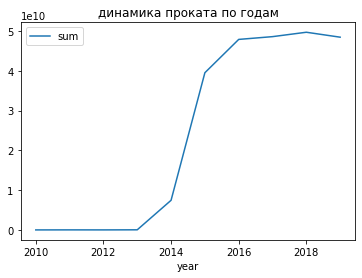

In [28]:
data_pivot.plot(title='динамика проката по годам', kind='line', y='sum')
print(f"В {data_pivot['sum'].idxmin()} году сумма сборов была минимальной, в {data_pivot['sum'].idxmax()} максимальной.")

display(data_pivot)

Итак, в 2010 году сумма сборов была минимальной, а в 2018 году максимальной.

Говоря о динамике сборов фильмов по годам становится видно, что рост начинает происходить только в 2013 году, постепенно увеличивает оборот от года к году и достигает своего пика в 2018 году и затем незначиатлеьно снижается.

**С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.**

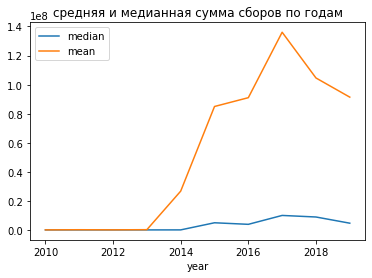

In [29]:
data_pivot.plot(title='средняя и медианная сумма сборов по годам', kind='line', y=['median', 'mean'])
print()

In [30]:
display(data_pivot)

,count,sum,mean,median
year,,,,
2010,105,2.428654e+06,2.313004e+04,1700.000
2011,109,1.410276e+07,1.293832e+05,3000.000
2012,128,6.955423e+06,5.433924e+04,5660.000
2013,184,2.979971e+07,1.619549e+05,3522.500
2014,279,7.444952e+09,2.668442e+07,18160.000
2015,465,3.949737e+10,8.494057e+07,4920933.000
2016,526,4.786630e+10,9.100057e+07,3846679.410
2017,357,4.856371e+10,1.360328e+08,9968340.000
2018,475,4.966840e+10,1.045651e+08,8891102.210


Итак, становится видно следующее: 
- Медианная сумма сборов не сильно колеблется на протяжении всего рассматриваемого периода. Увеличение просиходит после 2014 года, а пик достигается в 2017 году и составляет 9968340 рублей. Затем происходит постепенное снижение. 
- Средняя сумма сборов отличается от медианной тем, что разброс данных от года к году достаочно большой. Увеличение среднего показателя сборов начинает происходить в 2013 году и достигает свеого пика в 2017-2018году. Средняя сумма сборов так сильно отличается от медианной так как, можно предположить, данные не одинаковы, существуют как очень маленькие сумма, так и большие6 что отражается на среднем значении.

Однако, при рассмотрении обоих показателей необходимо учитывать тот факт, что само количество фильмов, вышедших в прокат не одинаково в каждый из годов. Таким образом, из постепенное увеличение также влиянет на показатели суммы сборов (как среднего, так и медианного).

**Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.**

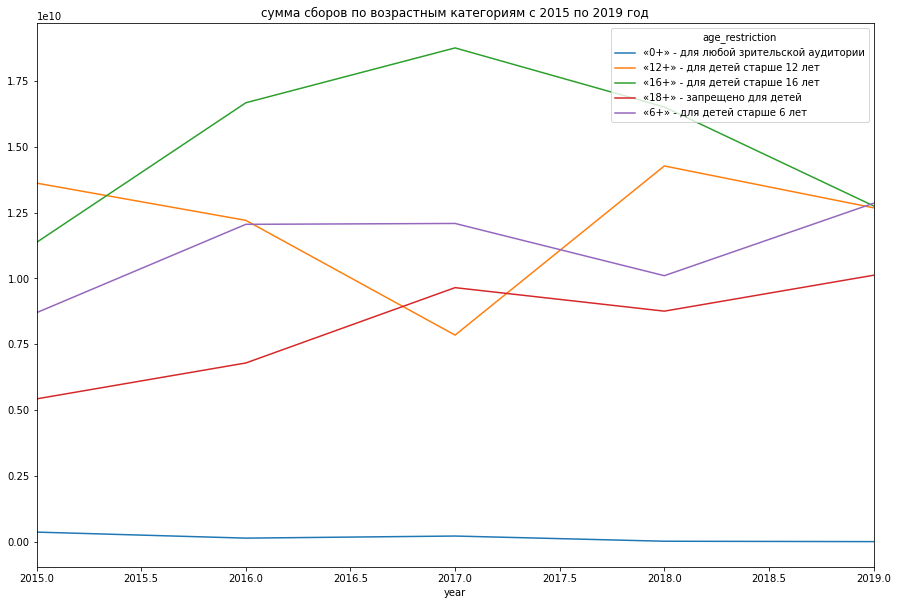

In [31]:
data[data['box_office'].notna()] \
    .pivot_table(index='year',
                columns='age_restriction',
                values='box_office',
                aggfunc='sum') \
    .plot(title='сумма сборов по возрастным категориям с 2015 по 2019 год', kind='line', xlim=[2015, 2019], figsize=(15,10))
print()

Итак, рассматривая распределение сборов фильмов в прокате по возрастным категориям становится видно следующее: 
- Фильмы для любой зрительской категории никак не оказывают влияния на сумма споров в рассматриваемый перирод времени и являются минимальными по сумме сборов. 
- Фильмы для категории 16+ являются самими кассовыми. Можно предположить, что данный факт связан с тем, что подростки чаше взрослых ходят в кино, так как у них есть больше свободного времени или же сама популряность такого времяпрепровождения как поход в кино наиболее высока именно у людей в возрасте 16-17 лет. Соотвественно6 это сказывается на сумме сборов от проката, так как посещаемость сеансов высокая. 
- Категория фильмов 12+ имела высокие суммы сборов с 2015 до 2017 года. В 2017 году произошло резкое нижение суммы сборов в данной категории, а затем, к 2018 году она вновь возрасла. Можно предположить, что снижение сумм сборов связано с тем, что уже было отмечено ранее: в 2017 году общее число вышедших фильмов вообще снизислоь. Возможно, это были фильмы как раз категории 12+.
- Категория фильмов 6+ имеет довольно высокие и стабильные показатели суммы сборов от проката. Данный факт свидетельствует о том, что поход в кино с детьми является поплуряным варинтом провести время вместе для родителей или иных родственников ребенка. Однако необходимо также отметить, что на сумму сборов а данной категории сильно влияет тот факт, что на фильмы 6+ чаще всего покупается 2 и более билета, так как маленькие дети не ходят в кино одни. В связи с чем, увеличивается и само число зрителей и сумма проката. 
- Категория 18+ имеет самые низкие показатели суммы сборов от праката из всех рассматриваемых категорий, в которых органичения установлены (0+ не берем). Можно предположить, что это связано с тем, что взрослые люди либо не любят ходить в кино, либо же, большинство фильмов попадают под категорию 16+, в связи с чем, они и занимают лидирующие позии по сумме сборов.

# Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

In [32]:
# Срздание столбцов для дальнейшего анализа.

data_support = data[data['refundable_support'].notna() | data['nonrefundable_support'].notna()]

data_support['full_support'] = data_support['nonrefundable_support'] + data_support['refundable_support']

data_support['profit'] = data_support['box_office'] / data_support['full_support'] - 1

data_support['paid'] = data_support['profit'] > 0

data_support['not_paid'] = ~data_support['paid']

/tmp/ipykernel_94/4042370738.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_support['full_support'] = data_support['nonrefundable_support'] + data_support['refundable_support']
/tmp/ipykernel_94/4042370738.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_support['profit'] = data_support['box_office'] / data_support['full_support'] - 1
/tmp/ipykernel_94/4042370738.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

<AxesSubplot:title={'center':'количество фильмов, получивших господдержку по жанрам'}>

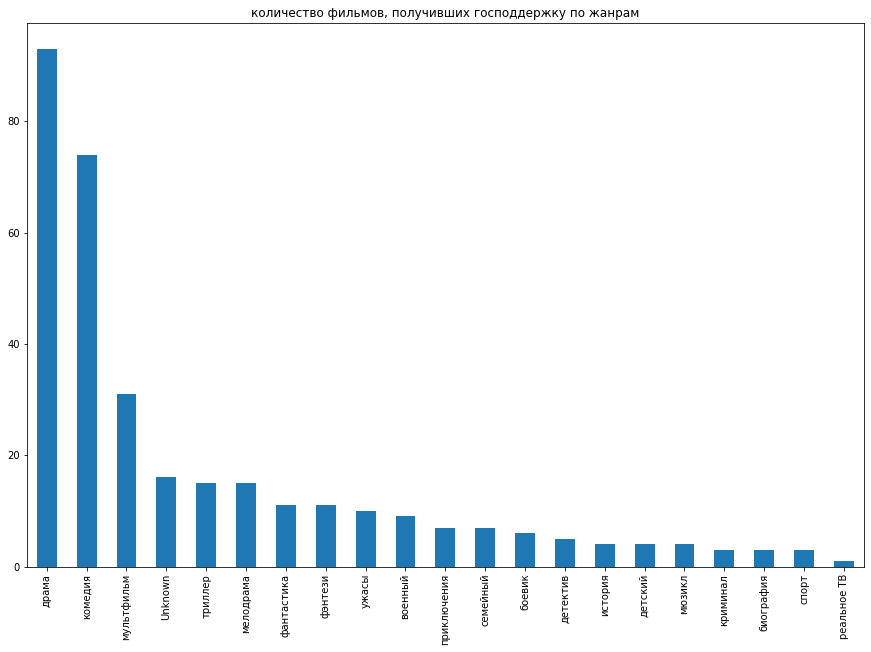

In [33]:
# Изучение общего количества фиьмов, получивших гос поддержку по жанрам.
data_support['info_genres'].value_counts().plot(title='количество фильмов, получивших господдержку по жанрам', kind='bar', figsize=(15,10))

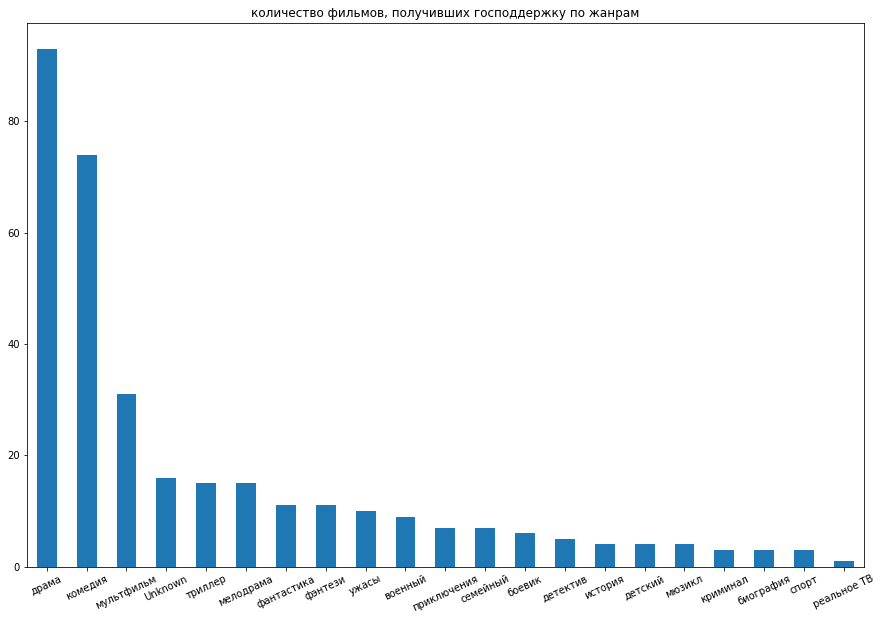

In [34]:
#Код ревьюера
import matplotlib.pyplot as plt

data_support['info_genres'].value_counts()\
    .plot(title='количество фильмов, получивших господдержку по жанрам', kind='bar', figsize=(15,10))
plt.xticks(rotation = 25)
plt.show()

Становится очевидно, что наибольшую государственную поддержку получают такие жанры как драмма и комедия. Финансирование других жанров значительно ниже.

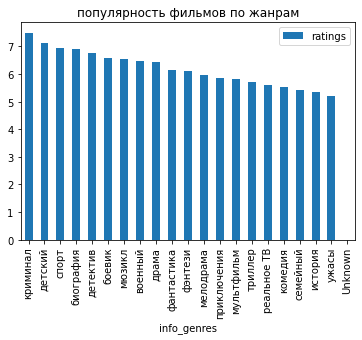

In [35]:
# Рассмотрение наиболее популярных жанров
data_support[['info_genres', 'ratings']].groupby('info_genres') \
                                        .agg('mean') \
                                        .sort_values(by='ratings', ascending=False) \
                                        .plot(title='популярность фильмов по жанрам', kind='bar')
plt.show()

Итак, можно увидеть, что наибольшее предпочтение люди отдают таким жанрам как криминал, детский и спорт. При этом, ужасы занимают последнее место в рассмотрении рейтингов фильмов по их жанрам. Пополярность жанров среди зрителей не соотносится с тем, на что выдяляются бюджетные средства, что свидетельствует от необходимости пересомтра определния финансирования по жанрам.

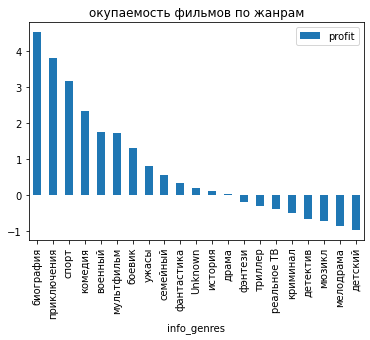

In [36]:
# изучение окупаемости фильмов по жанрам

data_support.groupby('info_genres') \
            .agg('mean') \
            .sort_values(by='profit',
                         ascending=False) \
            .plot(title='окупаемость фильмов по жанрам',
                  kind='bar',
                  stacked=True,
                  y='profit')
plt.show()

Рассмотрение окупаемости, в отличии от рейтинга, показывает, что биография, приклчения и спорт являются наиболее окупаемыми фильмами. В то время как жанры с высоким рейтингом - криминл и детский- наоборот уводят своих проихводителей в минус. Можно предположить, что данный факт связан с тем, что снять фильм в жанре криминал или детский намного дороже из-за спец эффектов или декораций, чем фильм жанра спорт.

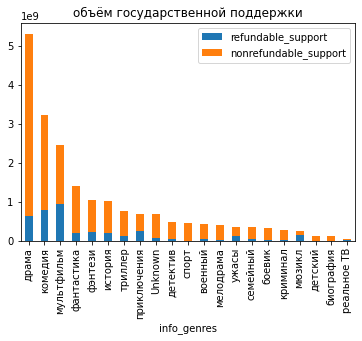

In [37]:
# изучение объема государственной поддержки по жанрам

data_support.groupby('info_genres') \
            .agg('sum') \
            .sort_values(by='full_support',
                         ascending=False) \
            .plot(title='объём государственной поддержки',
                  kind='bar',
                  stacked=True,
                  y=['refundable_support', 'nonrefundable_support'])
print()

Можно увидеть, что такие жанры как драма, комедии и мультфильм получают наибольшую поддержку от государства в вопросе финансирования. При этом, данные жанры не являются ни наиболее окупаемыми, ни наиболее популряными по рейтингу. Таким образом, можно говорить о том, что распредление государственного субсидирования кинопроизводства по жанрам не логично с точки зрения результата как в вопросе заинтересованности зрителей, так и в вопросе окупаемости.

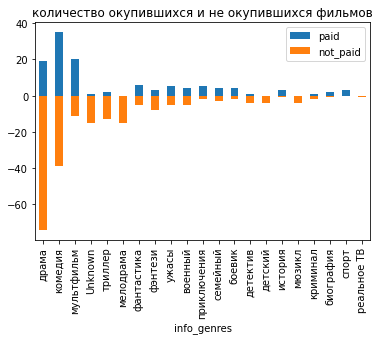

In [38]:
# Изучение количества окупившихся и не окупившихся фильмов
data_support.groupby('info_genres') \
            .agg({'title': 'count',
                  'paid': 'sum',
                  'not_paid': lambda x: 0 - x.sum()}) \
            .sort_values(by='title',
                         ascending=False) \
            .plot(title='количество окупившихся и не окупившихся фильмов',
                  kind='bar',
                  stacked=True,
                  y=['paid', 'not_paid'])
print()

Рассмотрение вопроса соотношения окупившихся и не окупившихся фильмов по жанарм демонстриурет, что съемка фильмов жанра драма самая не окупаемая, при этом мультфильмы окупаются намного чаще, чем не окупается, акомедии имеют одинаковые шансы на успех и на провал. Таким образом, данный график позволяет говорить о том, в какие жанры перспективней вкладываться государству в рамках пргнозирования рисков провала.

# Шаг 5. Напишите общий вывод

Говоря о датафрейме, можно выделить следующее: 
- данные содержат большое количество пропсуков в различных столбцах. 
- данные имеют различную форму записи: проценты, пропуски, знаки препинания.



Говоря о киноиндустрии в целом, можно отметить следующее: 
- В 2010 году сумма сборов была минимальной, а в 2018 году максимальной.
Говоря о динамике сборов фильмов по годам становится видно, что рост начинает происходить только в 2013 году, постепенно увеличивает оборот от года к году и достигает своего пика в 2018 году и затем незначиатлеьно снижается.
    
- Становится видно следующее:
    - Медианная сумма сборов не сильно колеблется на протяжении всего рассматриваемого периода. Увеличение просиходит после 2014 года, а пик достигается в 2017 году и составляет 9968340 рублей. Затем происходит постепенное снижение.
    - Средняя сумма сборов отличается от медианной тем, что разброс данных от года к году достаочно большой. Увеличение среднего показателя сборов начинает происходить в 2013 году и достигает свеого пика в 2017-2018году. Средняя сумма сборов так сильно отличается от медианной так как, можно предположить, данные не одинаковы, существуют как очень маленькие сумма, так и большие6 что отражается на среднем значении.
    - Однако, при рассмотрении обоих показателей необходимо учитывать тот факт, что само количество фильмов, вышедших в прокат не одинаково в каждый из годов. Таким образом, из постепенное увеличение также влиянет на показатели суммы сборов (как среднего, так и медианного).
    
- Рассматривая распределение сборов фильмов в прокате по возрастным категориям становится видно следующее:
    - Фильмы для любой зрительской категории никак не оказывают влияния на сумма споров в рассматриваемый перирод времени и являются минимальными по сумме сборов.
    - Фильмы для категории 16+ являются самими кассовыми. Можно предположить, что данный факт связан с тем, что подростки чаше взрослых ходят в кино, так как у них есть больше свободного времени или же сама популряность такого времяпрепровождения как поход в кино наиболее высока именно у людей в возрасте 16-17 лет. Соотвественно6 это сказывается на сумме сборов от проката, так как посещаемость сеансов высокая.
    - Категория фильмов 12+ имела высокие суммы сборов с 2015 до 2017 года. В 2017 году произошло резкое нижение суммы сборов в данной категории, а затем, к 2018 году она вновь возрасла. Можно предположить, что снижение сумм сборов связано с тем, что уже было отмечено ранее: в 2017 году общее число вышедших фильмов вообще снизислоь. Возможно, это были фильмы как раз категории 12+.
    - Категория фильмов 6+ имеет довольно высокие и стабильные показатели суммы сборов от проката. Данный факт свидетельствует о том, что поход в кино с детьми является поплуряным варинтом провести время вместе для родителей или иных родственников ребенка. Однако необходимо также отметить, что на сумму сборов а данной категории сильно влияет тот факт, что на фильмы 6+ чаще всего покупается 2 и более билета, так как маленькие дети не ходят в кино одни. В связи с чем, увеличивается и само число зрителей и сумма проката.
    - Категория 18+ имеет самые низкие показатели суммы сборов от праката из всех рассматриваемых категорий, в которых органичения установлены (0+ не берем). Можно предположить, что это связано с тем, что взрослые люди либо не любят ходить в кино, либо же, большинство фильмов попадают под категорию 16+, в связи с чем, они и занимают лидирующие позии по сумме сборов.
    

Говоря о фильмах с государственной поддержкой можно сделать следующие общие выводы: 
- наибольшую государственную поддержку получают такие жанры как драмма и комедия. Финансирование других жанров значительно ниже.
- наибольшее предпочтение люди отдают таким жанрам как криминал, детский и спорт. При этом, ужасы занимают последнее место в рассмотрении рейтингов фильмов по их жанрам. Пополярность жанров среди зрителей не соотносится с тем, на что выдяляются бюджетные средства, что свидетельствует от необходимости пересомтра определния финансирования по жанрам.
- рассмотрение окупаемости, в отличии от рейтинга, показывает, что биография, приклчения и спорт являются наиболее окупаемыми фильмами. В то время как жанры с высоким рейтингом - криминл и детский- наоборот уводят своих проихводителей в минус. Можно предположить, что данный факт связан с тем, что снять фильм в жанре криминал или детский намного дороже из-за спец эффектов или декораций, чем фильм жанра спорт.
- такие жанры как драма, комедии и мультфильм получают наибольшую поддержку от государства в вопросе финансирования. При этом, данные жанры не являются ни наиболее окупаемыми, ни наиболее популряными по рейтингу. Таким образом, можно говорить о том, что распредление государственного субсидирования кинопроизводства по жанрам не логично с точки зрения результата как в вопросе заинтересованности зрителей, так и в вопросе окупаемости.
- Рассмотрение вопроса соотношения окупившихся и не окупившихся фильмов по жанарм демонстриурет, что съемка фильмов жанра драма самая не окупаемая, при этом мультфильмы окупаются намного чаще, чем не окупается, акомедии имеют одинаковые шансы на успех и на провал. Таким образом, данный график позволяет говорить о том, в какие жанры перспективней вкладываться государству в рамках пргнозирования рисков провала.